[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/blob/master/Jupyter%20Notebooks/Paper%20-%20Figure%201%20-%20Delta%20Quantity.ipynb)

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = Path('data')
delta_quantity_path = Path.joinpath(data_dir, Path('delta_quantity_under_1b.npz'))

In [3]:
if not delta_quantity_path.exists():
    print('Notebooks required data not found.')
    choice = input('Do you want to download 8.64MB data? (y/n)')
    if choice == 'y':
        print('Run this cell again')        
        %load https://raw.githubusercontent.com/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/master/Jupyter%20Notebooks/download_notebooks_data.py

In [4]:
delta_quantity = np.load(delta_quantity_path)

In [5]:
orders = (1, 10, 100, 1000)
sizes = (50847532, 50847514, 50847334, 50845534)
minsize = min(sizes)
samples = 1e6
sample_indices = np.linspace(0, minsize-1, int(samples), dtype=np.uint64)
arrays = [delta_quantity[f'order_{o}'].astype(np.uint64)[sample_indices] for o in orders]

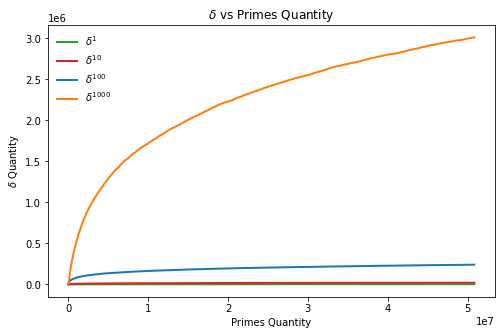

In [6]:
tab_linecolors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange', 'tab:purple']
figsize = (8, 5)
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(*figsize)
indexes = [0, 1, 2, 3]
for i in indexes:
    label = '$\delta^{' + f'{orders[i]}' + '}$'
    ax.plot(sample_indices, arrays[i], label=label, linewidth=2, color=tab_linecolors[i])
ax.set_title('$\delta$ vs Primes Quantity')
ax.set_xlabel('Primes Quantity')
ax.set_xscale('linear')
ax.set_ylabel('$\delta$ Quantity')
ax.set_yscale('linear')

ax.legend(frameon=False)
plt.show()